<a href="https://colab.research.google.com/github/nur303/Problem-solve/blob/main/cse317-Assignment_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/mirsazzathossain/CSE317-Lab/blob/main/Lab_Assignment_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Find the following integral using the simpson's 1/3 rule**

Simpson's 1/3 rule uses higher-order polynomials to approximate the integral of a function $f(x)$ over the interval $[a,b]$. For Example, if there is an extra point midway between $f(a)$ and $f(b)$, the three points can be connected with a parabola. The area under the parabola is an approximation of the integral of $f(x)$ over the interval $[a,b]$.

<center>
    <img src="./images/simpson.PNG" width="400" />
</center>

If we are given values of $f(x)$ at 3 points as $(x_0, f(x_0))$, $(x_1, f(x_1))$, and $(x_2, f(x_2))$ then we can estimate $f(x)$ using the Lagrange polynomial of degree 2:

$$
\begin{align*}
f(x) &\approx f(x_0) \frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)} + f(x_1) \frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)} + f(x_2) \frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)}
\end{align*}
$$

Now, as the area under the estimated curve is an approximation of the integral of $f(x)$ over the interval $[a,b]$, we can write the integral as:

$$
\begin{align*}
I &= \int_{a}^{b} f(x) dx \\
&\approx \int_{a}^{b} \left[f(x_0)\frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)} + f(x_1) \frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)} + f(x_2) \frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)} \right] dx
\end{align*}
$$

When $a = x_0$, $b = x_2$, $x_1 = \frac{a+b}{2}$, and $h = \frac{b-a}{2}$, we can simplify the integral to:

$$
\begin{align*}
    I &\approx \frac{h}{3} \left[ f(x_0) + 4f(x_1) + f(x_2) \right] \\
    &= (b-a) \frac{f(x_0) + 4f(x_1) + f(x_2)}{6}
\end{align*}
$$

We will use Simpson's 1/3 rule to approximate the integral of $f(x) = 0.2 + 25x - 200x^2 + 675x^3 - 900x^4 + 400x^5$ over the interval $[0, 0.8]$. Follow the steps below to approximate the integral using Simpson's 1/3 rule.

##### **Step 1: Define the function**

Define a function `f` that takes a single parameter `x` and returns the value of $f(x) = 0.2 + 25x - 200x^2 + 675x^3 - 900x^4 + 400x^5$ at `x`. Note that the function should be able to handle both scalar and vector inputs.


In [1]:
# Write appropriate code
import numpy as np

# Define the function f(x)
def f(x):
    x = np.array(x)  # Convert input to NumPy array for vectorized computation
    return 0.2 + 25*x - 200*x**2 + 675*x**3 - 900*x**4 + 400*x**5

# Simpson's 1/3 Rule implementation
def simpsons_rule(f, a, b):
    h = (b - a) / 2
    x0 = a
    x1 = a + h
    x2 = b

    fx0 = f(x0)
    fx1 = f(x1)
    fx2 = f(x2)

    integral = (h / 3) * (fx0 + 4 * fx1 + fx2)
    return integral

# Define the interval
a = 0
b = 0.8

# Calculate the integral
result = simpsons_rule(f, a, b)

# Display the result
print("Approximate value of the integral:", result)


Approximate value of the integral: 1.3674666666666742


##### **Step 2: Define a function to approximate the function $f(x)$ using Lagrange polynomial**

Define a function `lagrange` that takes four parameters `x0`, `x1`, `x2` and `x` and returns the value of the Lagrange polynomial of degree 2 at `x`. The function should be able to handle both scalar and vector inputs. Use the function `f` defined in Step 1 to evaluate the function at the given points.

In [2]:
# write appropriate code
import numpy as np

# Define the function f(x)
def f(x):
    x = np.array(x)  # Convert input to NumPy array to support scalar/vector
    return 0.2 + 25*x - 200*x**2 + 675*x**3 - 900*x**4 + 400*x**5

# Define the Lagrange polynomial function of degree 2
def lagrange(x0, x1, x2, x):
    x = np.array(x)  # Ensure vectorized operations

    # Function values at x0, x1, x2
    f0 = f(x0)
    f1 = f(x1)
    f2 = f(x2)

    # Compute Lagrange basis polynomials
    L0 = ((x - x1)*(x - x2)) / ((x0 - x1)*(x0 - x2))
    L1 = ((x - x0)*(x - x2)) / ((x1 - x0)*(x1 - x2))
    L2 = ((x - x0)*(x - x1)) / ((x2 - x0)*(x2 - x1))

    # Compute Lagrange interpolated value
    return f0 * L0 + f1 * L1 + f2 * L2

# Example usage

# Define interpolation points
x0 = 0.0
x1 = 0.4
x2 = 0.8

# Scalar input
x_scalar = 0.4
print("Lagrange at x = 0.4:", lagrange(x0, x1, x2, x_scalar))

# Vector input
x_vector = [0.0, 0.2, 0.4, 0.6, 0.8]
print("Lagrange at multiple x values:", lagrange(x0, x1, x2, x_vector))


Lagrange at x = 0.4: 2.4560000000000004
Lagrange at multiple x values: [0.2   1.888 2.456 1.904 0.232]


##### **Step 3: Define the interval**
Define the interval as a numpy array of two elements, where the first element is the lower bound and the second element is the upper bound. Name the array `interval`.

In [4]:
import numpy as np

# Define the interval [a, b] as a NumPy array
interval = np.array([0.0, 0.8])

# Print the interval
print("Interval:", interval)

# Access and print lower and upper bounds
lower_bound = interval[0]
upper_bound = interval[1]

print("Lower bound (a):", lower_bound)
print("Upper bound (b):", upper_bound)


Interval: [0.  0.8]
Lower bound (a): 0.0
Upper bound (b): 0.8


##### **Step 4: Plot the function and the approximated polynomial**

Plot the function $f(x)$ and the approximated polynomial using the function `lagrange` defined in Step 2. Use the interval defined in Step 3 as the x-axis. Also, plot the points $(x_0, f(x_0))$, $(x_1, f(x_1))$, and $(x_2, f(x_2))$ on the same plot. Fill the area under the approximated polynomial using numpy's `fill_between` function.

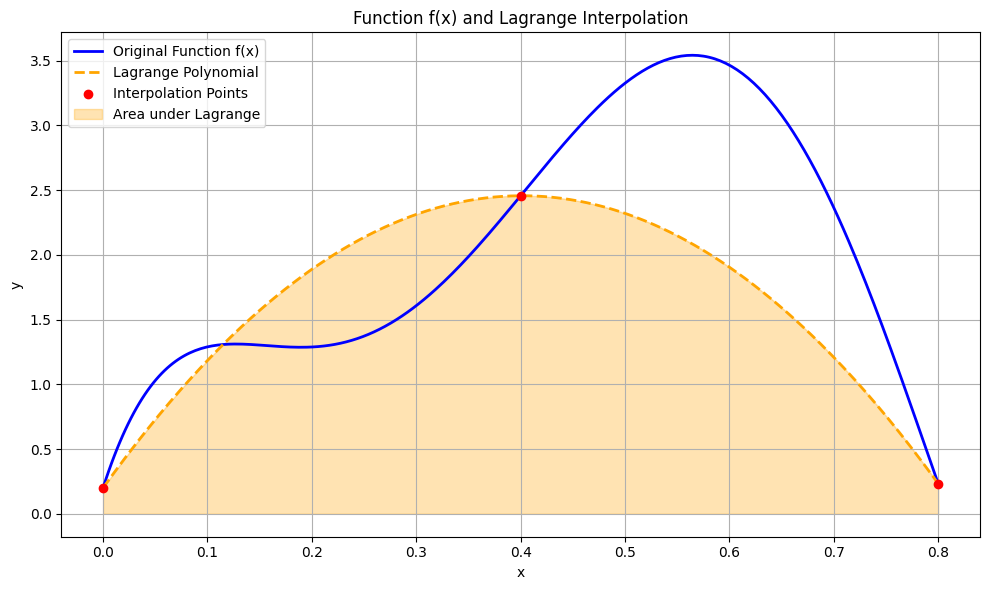

In [5]:
# Write appropriate code
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define f(x)
def f(x):
    x = np.array(x)
    return 0.2 + 25*x - 200*x**2 + 675*x**3 - 900*x**4 + 400*x**5

# Step 2: Define the Lagrange polynomial of degree 2
def lagrange(x0, x1, x2, x):
    x = np.array(x)
    f0 = f(x0)
    f1 = f(x1)
    f2 = f(x2)

    L0 = ((x - x1)*(x - x2)) / ((x0 - x1)*(x0 - x2))
    L1 = ((x - x0)*(x - x2)) / ((x1 - x0)*(x1 - x2))
    L2 = ((x - x0)*(x - x1)) / ((x2 - x0)*(x2 - x1))

    return f0*L0 + f1*L1 + f2*L2

# Step 3: Define the interval as a numpy array
interval = np.array([0.0, 0.8])

# Define x0, x1, x2
x0 = interval[0]
x2 = interval[1]
x1 = (x0 + x2) / 2

# Generate fine x values for plotting
x_vals = np.linspace(x0, x2, 300)

# Compute original function and Lagrange polynomial
f_vals = f(x_vals)
lagrange_vals = lagrange(x0, x1, x2, x_vals)

# Interpolation points
x_points = [x0, x1, x2]
y_points = [f(x0), f(x1), f(x2)]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_vals, f_vals, label='Original Function f(x)', color='blue', linewidth=2)
plt.plot(x_vals, lagrange_vals, label='Lagrange Polynomial', color='orange', linestyle='--', linewidth=2)
plt.scatter(x_points, y_points, color='red', zorder=5, label='Interpolation Points')

# Fill area under Lagrange polynomial
plt.fill_between(x_vals, lagrange_vals, color='orange', alpha=0.3, label='Area under Lagrange')

# Labels and legend
plt.title('Function f(x) and Lagrange Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


##### **Step 5: Define a function to approximate the integral using Simpson's 1/3 rule**

Define a function `simpson` that takes a parameter `interval` and returns the approximate value of the integral of $f(x)$ over the interval `interval` using Simpson's 1/3 rule. You have to employ the following steps:

*   Calculate the midpoint of the interval. Store the value in a variable named `midpoint`.
*   Calculate the value of $f(x_0)$, $f(x_1)$, and $f(x_2)$, where $x_0 = a$, $x_1 = \frac{a+b}{2} = midpoint$, and $x_2 = b$. Store the values in variables named `f0`, `f1`, and `f2` respectively.
*   Calculate the approximate value of the integral using Simpson's 1/3 rule. Store the value in a variable named `I`.
*   Return the value of `I`.

In [6]:
# Write appropriate code
import numpy as np

# Define the function f(x)
def f(x):
    x = np.array(x)
    return 0.2 + 25*x - 200*x**2 + 675*x**3 - 900*x**4 + 400*x**5

# Define the Simpson's 1/3 rule function
def simpson(interval):
    a = interval[0]
    b = interval[1]

    # Step 1: Calculate midpoint
    midpoint = (a + b) / 2

    # Step 2: Evaluate f at x0, x1, x2
    f0 = f(a)         # f(x0)
    f1 = f(midpoint)  # f(x1)
    f2 = f(b)         # f(x2)

    # Step 3: Apply Simpson's 1/3 rule
    I = (b - a) / 6 * (f0 + 4*f1 + f2)

    # Step 4: Return the result
    return I

# Example usage
interval = np.array([0.0, 0.8])
result = simpson(interval)
print("Approximate integral using Simpson's 1/3 rule:", result)


Approximate integral using Simpson's 1/3 rule: 1.3674666666666742


##### **Step 6: Approximate the integral using Simpson's 1/3 rule**

Call the function `simpson` with the interval `interval` as the parameter. Store the value returned by the function in a variable named `I`. Print the value of `I`. Then you should compute the integral analytically and find the absolute relative error between the two values. Print the absolute relative error.

In [7]:
# Write appropriate code
import numpy as np

# Define the function f(x)
def f(x):
    x = np.array(x)
    return 0.2 + 25*x - 200*x**2 + 675*x**3 - 900*x**4 + 400*x**5

# Define the analytical integral (antiderivative) of f(x)
def F(x):
    x = np.array(x)
    # Integrate term-by-term:
    # ∫0.2 dx = 0.2x
    # ∫25x dx = 25 x^2 / 2
    # ∫-200x^2 dx = -200 x^3 / 3
    # ∫675x^3 dx = 675 x^4 / 4
    # ∫-900x^4 dx = -900 x^5 / 5 = -180 x^5
    # ∫400x^5 dx = 400 x^6 / 6 = (200/3) x^6
    return (0.2*x +
            25*(x**2)/2 -
            200*(x**3)/3 +
            675*(x**4)/4 -
            180*(x**5) +
            (200/3)*(x**6))

# Simpson's 1/3 rule function
def simpson(interval):
    a = interval[0]
    b = interval[1]
    midpoint = (a + b) / 2
    f0 = f(a)
    f1 = f(midpoint)
    f2 = f(b)
    I = (b - a) / 6 * (f0 + 4*f1 + f2)
    return I

# Define the interval
interval = np.array([0.0, 0.8])

# Call simpson and store result
I = simpson(interval)
print(f"Approximate integral using Simpson's 1/3 rule: {I}")

# Compute analytical integral value
a = interval[0]
b = interval[1]
I_exact = F(b) - F(a)
print(f"Analytical integral value: {I_exact}")

# Compute absolute relative error
abs_rel_error = abs((I_exact - I) / I_exact)
print(f"Absolute relative error: {abs_rel_error}")


Approximate integral using Simpson's 1/3 rule: 1.3674666666666742
Analytical integral value: 1.6405333333333445
Absolute relative error: 0.16644993498049526
